In [1]:
println("Hello World!")

Hello World!


In [2]:
a = 3
b = 5
println(a,b)

35


In [3]:
for i in 1:10
    println(i)
end

1
2
3
4
5
6
7
8
9
10


In [4]:
typeof(0)

Int64

In [5]:
typeof(0.0)

Float64

In [13]:
function to_jd(year, month, day)
    mjd = floor(year * 365.25) + floor(year/400) - floor(year/100) + floor(30.59 * (month - 2)) + day - 678912.0 + 2400000.5
    return mjd
end
@show to_jd(2024.0,4.0,1.0)

to_jd(2024.0, 4.0, 1.0) = 2.4604015e6


2.4604015e6

In [14]:
deg2rad(90)

1.5707963267948966

## シミュレーション by ケプラー


In [1]:
using JSON

global planets

function loadData(epoch)
    global planets
    file = JSON.parsefile("data.json")
    planets = file[epoch]
end

function calcM(m0, t0, p, t)
    M = m0 + 2π * (t - t0) / p
    return M
end

function calcE(M, e)
    E = M
    for i in 1:10
        E = E - (M - E + e * sin(E)) / (e * cos(E) - 1.0)
    end
    return E
end

function calcPosition(name, t)
    t0 = planets["epoch"]
    data = planets[name]
    incl = deg2rad(data["incl"])
    lan = deg2rad(data["lan"])
    peri = deg2rad(data["lperi"] - data["lan"])
    a = data["a"]
    e = data["e"]
    m0 = deg2rad(data["m0"])
    p = data["p"]
    

    E = calcE(calcM(m0,t0,p,t), e)
    X = a * cos(E)
    Y = sqrt(1.0 - e^2) * a * sin(E)

    println(E)
    
    pos = [
        cos(lan) -sin(lan) 0.0
        sin(lan) cos(lan) 0.0
        0.0 0.0 1.0
    ] * [
        1.0 0.0
        0.0 cos(incl)
        0.0 sin(incl)
    ] * [
        cos(peri) -sin(peri)
        sin(peri) cos(peri)
    ] * [
        X-a*e
        Y
    ]
    return pos
end

loadData("2024-03-31")

# 2024/4/1
t = 2460401.5 + 680.0
for (key, value) in planets
    if key != "epoch"
        pos = calcPosition(key, t)
        println(key, pos)
    end
end

1.6604139778135483
jupiter[-1.9808956023095452, 4.835079947899963, 0.024246246564256543]
4.370204442510108
uranus[9.48121735573783, 17.05990488216639, -0.059629479691950336]
5.46057122859598
neptune[29.90617899501818, 0.3032142886110094, -0.6953692498122025]
22.49622030247704
venus[0.6838504002559245, -0.24479278125134107, -0.042815585540000395]
49.4389077611178
mercury[0.31074789614874593, 0.11872671215647018, -0.01880125788216052]
13.217196838958213
earth[-0.7656183939980934, 0.6224407675446799, -2.8834764852509387e-5]
12.119409088084266
mars[0.8611995601090481, -1.0970127627300137, -0.044118227278566735]
4.761168452119076
saturn[9.50990178182364, 0.4634193684551296, -0.38686490441143845]


## 終わり！！

In [11]:
include("main.jl")

jupiter[2.9626994002744174, 4.030047128686638, -0.08297409352501968]
uranus[11.743033241222665, 15.729006823002909, -0.09391005421133555]
neptune[29.86717415924818, -1.8464644039820826, -0.6502075993807471]
venus[0.6353945017344536, -0.35276120082584195, -0.04150245586102198]
mercury[-0.33277261008821524, 0.12926196754357672, 0.04108896337351888]
earth[-0.9794548097881313, -0.19795165694211325, 1.4956955357880944e-5]
mars[0.9393652962242416, -1.0254610575824845, -0.04453588682426547]
saturn[9.167257480343368, -3.259287557505479, -0.3084240901070982]


In [24]:
x=[1 2 3
4 5 6]
y = x[:,2:2]

2×1 Matrix{Int64}:
 2
 5

In [21]:
a = zeros(4,3)

4×3 Matrix{Float64}:
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0

In [27]:
x = [1 2 3]
x'

3×1 adjoint(::Matrix{Int64}) with eltype Int64:
 1
 2
 3

In [31]:
x = [1 2
2 3]

2×2 Matrix{Int64}:
 1  2
 2  3

In [33]:
using Statistics
x = [1, 5, 4, 9, -2]
mean(x)

3.4

In [35]:
zeros((2,3,4))

2×3×4 Array{Float64, 3}:
[:, :, 1] =
 0.0  0.0  0.0
 0.0  0.0  0.0

[:, :, 2] =
 0.0  0.0  0.0
 0.0  0.0  0.0

[:, :, 3] =
 0.0  0.0  0.0
 0.0  0.0  0.0

[:, :, 4] =
 0.0  0.0  0.0
 0.0  0.0  0.0

In [37]:
a = 1
b  = 2
if a == 2 || b == 2
    println("OK")
end

OK


In [43]:
max(20,1)

20

In [48]:
pos = [
    0 1 2
    5 6 7
]
println(pos)

[0 1 2; 5 6 7]


In [53]:
include("siml.jl")

LoadError: LoadError: MethodError: objects of type Matrix{Int64} are not callable
Use square brackets [] for indexing an Array.
in expression starting at /Users/shim/Desktop/Code/Julia/Planet/siml.jl:91

In [54]:
v1 = [
    2
    0
]
v2 = [
    0
    2
]
v1 + v2

2-element Vector{Int64}:
 2
 2

In [62]:
x = [
    1
    2
    3
]
println(x)
println(x')
println(x' - x)

[1, 2, 3]
[1 2 3]


DimensionMismatch: DimensionMismatch("dimensions must match: a has dims (Base.OneTo(1), Base.OneTo(3)), b has dims (Base.OneTo(3),), mismatch at 1")

In [66]:
x = [1;2;3]
x' .- x

3×3 Matrix{Int64}:
  0   1  2
 -1   0  1
 -2  -1  0

In [80]:
pos = [
    0 0 0
    1 2 0
    5 0 0
]
pos[:,3,1]

3-element Vector{Int64}:
 0
 0
 0

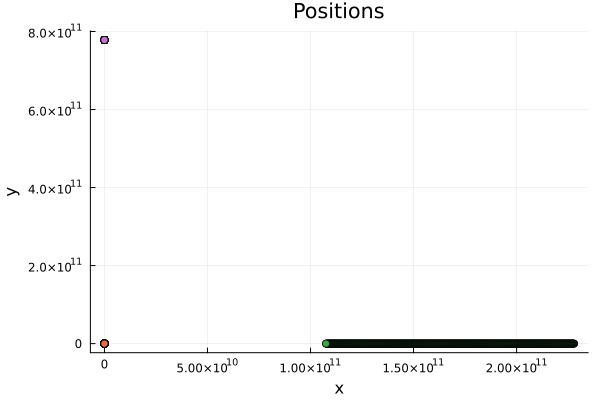

In [47]:
using LinearAlgebra
using Statistics
using Plots

m_sun = 1.988e30
m_mars = 6.416e23
r_mars = 2.279e11
v_mars = 24.08e3
m_jupiter = 1.898e27
r_jupiter = 7.783e11
v_jupiter = 13.06e3


function getAcc(pos, mass , G)
    x = pos[:,1,1]
    y = pos[:,2,1]
    z = pos[:,3,1]

    #天体間の距離
    dx = x' .- x
    dy = y' .- y
    dz = z' .- z

    #距離の3乗の逆数
    inv_r3 = (dx.^2 .+ dy.^2 .+ dz.^2 .+ 0.1).^(-1.5)

    #加速度
    ax = G * (dx .* inv_r3) * mass
    ay = G * (dy .* inv_r3) * mass
    az = G * (dz .* inv_r3) * mass

    #連結
    return hcat(ax,ay,az)
end

function getEnergy(pos, vel, mass, G)
    #運動エネルギーの総和
    KE = 0.5 * sum(sum(mass .* vel^2))

    x = pos[:,1,1]
    y = pos[:,2,1]
    z = pos[:,3,1]
    dx = x' .- x
    dy = y' .- y
    dz = z' .- z 
    
    inv_r = (dx.^2 .+ dy.^2 .+ dz.^2) .^ (0.5)
    inv_r[inv_r .> 0] = 1.0 ./ inv_r[inv_r .> 0]
    PE = G * sum(sum(triu(-(mass * mass')*inv_r,1)))

    return KE, PE

end

function main()
    #a = getAcc(pos, mass, G)
    #a[1,:] = [0;0;0]
    

    t = 0.0
    tEnd = 500.0
    dt = 1.0
    G = 6.674e-11
    mass = [
        m_sun
        m_mars
        m_jupiter
    ]
    pos = [
        0.0 0.0 0.0
        r_mars 0.0 0.0
        0.0 r_jupiter 0.0
    ]
    vel = [
        0.0 0.0 0.0
        -v_mars * 10000 0.0 0.0
        v_jupiter 0.0 0.0
    ]

    acc = getAcc(pos, mass, G)

    KE,PE = getEnergy(pos, vel, mass, G)

    Nt = Int(ceil(tEnd/dt))

    pos_save = zeros((3,3,Nt+1))
	pos_save[:,:,1] = pos
	KE_save = zeros(Nt+1)
	KE_save[1] = KE
	PE_save = zeros(Nt+1)
	PE_save[1] = PE

    for i in 1:Nt
		vel += acc * dt/2.0
		pos += vel * dt
		acc = getAcc( pos, mass, G)
		vel += acc * dt/2.0
		t += dt

        KE, PE  = getEnergy( pos, vel, mass, G )
        pos_save[:,:,i+1] = pos
		KE_save[i+1] = KE
		PE_save[i+1] = PE
    end

    p = scatter([0], [0], title="Positions", xlabel="x", ylabel="y", legend=false)
    
    for i in 1:3
        x = pos_save[i,1,:]
        y = pos_save[i,2,:]
        scatter!(p, x, y)
    end

    display(p)
end

main()


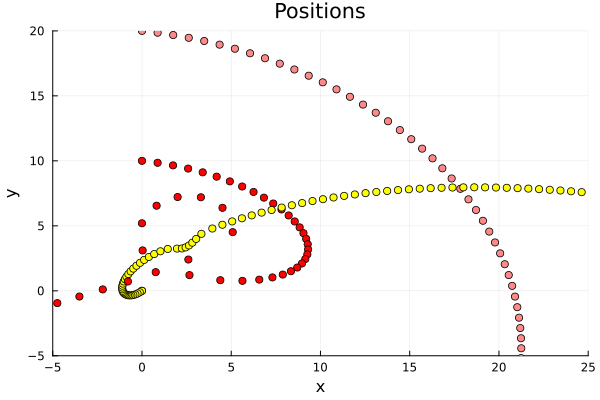

┌ Info: Saved animation to /Users/shim/Desktop/Code/dev/Asteroid/Julia/animation.gif
└ @ Plots /Users/shim/.julia/packages/Plots/ju9dp/src/animation.jl:156


Plots.AnimatedGif("/Users/shim/Desktop/Code/dev/Asteroid/Julia/animation.gif")
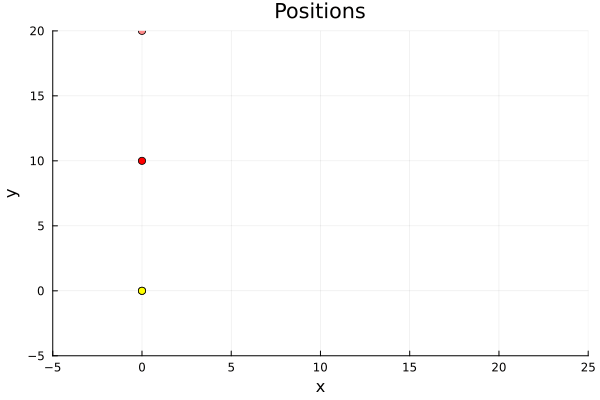

In [3]:
using LinearAlgebra
using Statistics
using Plots
using FFMPEG

function getAcc(pos, mass , G)
    x = pos[:,1,1]
    y = pos[:,2,1]
    z = pos[:,3,1]

    #天体間の距離
    dx = x' .- x
    dy = y' .- y
    dz = z' .- z

    #距離の3乗の逆数
    inv_r3 = (dx.^2 .+ dy.^2 .+ dz.^2 .+ 0.1).^(-1.5)

    #加速度
    ax = G * (dx .* inv_r3) * mass
    ay = G * (dy .* inv_r3) * mass
    az = G * (dz .* inv_r3) * mass

    #連結
    return hcat(ax,ay,az)
end

function getEnergy(pos, vel, mass, G)
    #運動エネルギーの総和
    KE = 0.5 * sum(sum(mass .* vel^2))

    x = pos[:,1,1]
    y = pos[:,2,1]
    z = pos[:,3,1]
    dx = x' .- x
    dy = y' .- y
    dz = z' .- z 
    
    inv_r = (dx.^2 .+ dy.^2 .+ dz.^2) .^ (0.5)
    inv_r[inv_r .> 0] = 1.0 ./ inv_r[inv_r .> 0]
    PE = G * sum(sum(triu(-(mass * mass')*inv_r,1)))

    return KE, PE

end

function main()
    #a = getAcc(pos, mass, G)
    #a[1,:] = [0;0;0]
    

    t = 0.0
    tEnd = 80.0
    dt = 1.0
    G = 1.0
    mass = [
        10.0
        1.0
        5.0
    ]
    pos = [
        0.0 0.0 0.0
        0.0 10.0 0.0
        0.0 20.0 0.0
    ]
    vel = [
        0.0 0.0 0.0
        1.0 0.0 0.0
        1.0 0.0 0.0
    ]
    vel .-= mean(mass .* vel) / mean(mass)
    
    acc = getAcc(pos, mass, G)

    KE,PE = getEnergy(pos, vel, mass, G)

    Nt = Int(ceil(tEnd/dt))

    pos_save = zeros((3,3,Nt+1))
	pos_save[:,:,1] = pos
	KE_save = zeros(Nt+1)
	KE_save[1] = KE
	PE_save = zeros(Nt+1)
	PE_save[1] = PE

    for i in 1:Nt
		vel += acc * dt/2.0
		pos += vel * dt
		acc = getAcc( pos, mass, G)
		vel += acc * dt/2.0
		t += dt

        KE, PE  = getEnergy( pos, vel, mass, G )
        pos_save[:,:,i+1] = pos
		KE_save[i+1] = KE
		PE_save[i+1] = PE
    end

    p = scatter([0], [0], xlims=(-5,25), ylims=(-5,20), title="Positions", xlabel="x", ylabel="y", legend=false)
    anim = @animate for frame in 1:Nt
        for i in 1:3
            x = pos_save[i,1,frame]
            y = pos_save[i,2,frame]
            scatter!(p, [x], [y], color=colors[i])
        end
    end

    display(p)
    gif(anim, "animation.gif", fps=10)
end

colors = [:yellow, :red, :"#ff8888"]

main()
